In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
import re
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from statistics import mode

def toSentence(list_words): # Convert list of words into sentence
        sentence = ' '.join(word for word in list_words)
        return sentence

data = pd.read_csv("labelled2.csv")
X = data['text_preprocessed'].apply(toSentence) 
max_features = 5000 
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(X.values)
X = tokenizer.texts_to_sequences(X.values)
X = pad_sequences(X)
y = data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

clf9 = XGBClassifier(random_state=42)
param9 = {}
param9['n_estimators'] = [10, 50, 100, 130]
param9['criterion'] = ['gini', 'entropy']
param9['max_depth'] = range(2, 10, 1)

params = [param9]
gs = GridSearchCV(clf9, params, cv=3, n_jobs=-1, scoring='accuracy').fit(X_train, y_train)
gs.best_params_

[22:35:04] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




{'criterion': 'gini', 'max_depth': 8, 'n_estimators': 130}

In [2]:
predictions = gs.predict(X_test)

if mode(predictions) == 0:
    hasil_prediksi = "Username is Negative"
elif mode(predictions) == 1:
    hasil_prediksi = "Username is Positive"

print("Prediksi : ",predictions)
print("Hasil Prediksi: ",hasil_prediksi)

Prediksi :  [1 0 0 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1
 0 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1
 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 1
 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 0
 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0
 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0
 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0 0 1 0 1
 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1
 1 0 1 1 1 1 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0
 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 1
 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 1 1
 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0
 1 0 0 1 1 1 

In [3]:
print("Test Accuracy Score:",accuracy_score(gs.predict(X_test), y_test))
print("Test Precision:",precision_score(gs.predict(X_test), y_test))
print("Test Recall:",recall_score(gs.predict(X_test), y_test))
print("Test ROC AUC Score:",roc_auc_score(gs.predict(X_test), y_test))

Test Accuracy Score: 0.6336760925449871
Test Precision: 0.5922077922077922
Test Recall: 0.6404494382022472
Test ROC AUC Score: 0.634205761755152


In [4]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.63      0.67      0.65       393
           1       0.64      0.59      0.62       385

    accuracy                           0.63       778
   macro avg       0.63      0.63      0.63       778
weighted avg       0.63      0.63      0.63       778



Text(0.5, 1.0, 'Confusion Matrix')

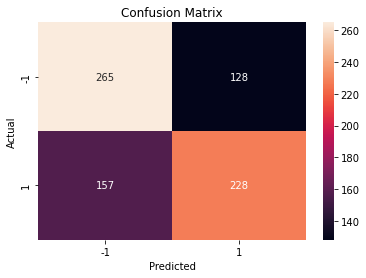

In [5]:
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix, annot=True, 
    xticklabels=[-1,1], 
    yticklabels=[-1,1],
    fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")